## PRAICP-1004-Rainfall-TS

In [1]:
# Import necessary libraries
import pandas as pd  # For data handling and manipulation
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from statsmodels.tsa.stattools import adfuller  # For stationarity test (ADF Test)
from statsmodels.tsa.seasonal import seasonal_decompose  # For time series decomposition
from statsmodels.tsa.arima.model import ARIMA  # For ARIMA time series forecasting
from pmdarima import auto_arima  # For automated ARIMA parameter selection

In [2]:
# Load the dataset
df1 = pd.read_csv("rainfall-monthly-number-of-rain-days.csv")
df2 = pd.read_csv("rainfall-monthly-highest-daily-total.csv")
df3 = pd.read_csv("rainfall-monthly-total.csv")

In [3]:
#combine the data frames
df = pd.concat([df1, df2, df3], axis=1)
df.head()

,month,no_of_rainy_days,month,maximum_rainfall_in_a_day,month,total_rainfall
0,1982-01,10,1982-01,36.5,1982-01,107.1
1,1982-02,5,1982-02,9.4,1982-02,27.8
2,1982-03,11,1982-03,61.7,1982-03,160.8
3,1982-04,14,1982-04,45.1,1982-04,157.0
4,1982-05,10,1982-05,33.0,1982-05,102.2


In [4]:
# Drop the repeated 'month' columns, keeping only the first one
df = df.loc[:,~df.columns.duplicated()]
df.head()

,month,no_of_rainy_days,maximum_rainfall_in_a_day,total_rainfall
0,1982-01,10,36.5,107.1
1,1982-02,5,9.4,27.8
2,1982-03,11,61.7,160.8
3,1982-04,14,45.1,157.0
4,1982-05,10,33.0,102.2


In [7]:
# Rename the columns
df = df.rename(columns={
    'month': 'Month',
    'no_of_rainy_days': 'No_of_Rainy_Days',
    'maximum_rainfall_in_a_day': 'Max_Rainfall_in_a_Day',
    'total_rainfall': 'Total_Rainfall'
})

df.head()

,Month,No_of_Rainy_Days,Max_Rainfall_in_a_Day,Total_Rainfall
0,1982-01,10,36.5,107.1
1,1982-02,5,9.4,27.8
2,1982-03,11,61.7,160.8
3,1982-04,14,45.1,157.0
4,1982-05,10,33.0,102.2


In [8]:
# Set the 'Month' column as the index
df["Month"] = pd.to_datetime(df["Month"])
df.set_index("Month", inplace=True)
df.head()

,No_of_Rainy_Days,Max_Rainfall_in_a_Day,Total_Rainfall
Month,,,
1982-01-01,10,36.5,107.1
1982-02-01,5,9.4,27.8
1982-03-01,11,61.7,160.8
1982-04-01,14,45.1,157.0
1982-05-01,10,33.0,102.2


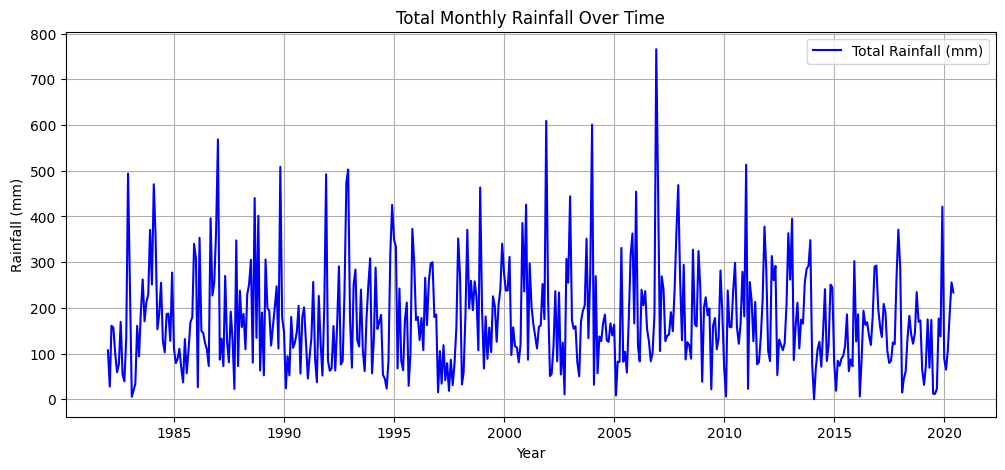

In [16]:
# Plot Total Rainfall Over Time
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Total_Rainfall"], label="Total Rainfall (mm)", color="b")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Total Monthly Rainfall Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Check for Stationarity
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is not stationary.")
    else:
        print("Series is stationary.")

adf_test(df["Total_Rainfall"])

ADF Statistic: -5.316803062036404
p-value: 5.0534566894916254e-06
Series is stationary.


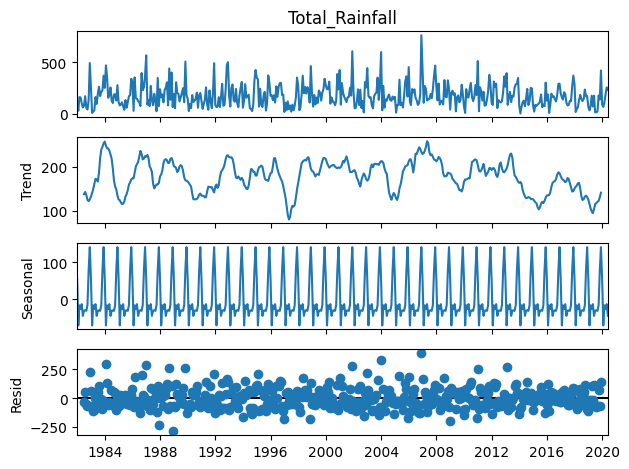

In [18]:
# Seasonal Decomposition
result = seasonal_decompose(df["Total_Rainfall"], model='additive', period=12)
result.plot()
plt.show()

In [19]:
# Auto ARIMA Model Selection
model = auto_arima(df["Total_Rainfall"], seasonal=True, m=12, stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.61 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5684.628, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5641.390, Time=0.58 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5648.960, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6251.387, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5668.373, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=5634.483, Time=1.77 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=5642.197, Time=1.71 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=5646.491, Time=1.42 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=5635.665, Time=2.67 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=5635.883, Time=4.12 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=5636.000, Time=1.62 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=5636.741, Time=4.31 sec
 ARIMA(1,0,0)(2,0,0)[12]     

In [20]:
# Train ARIMA Model
arima_model = ARIMA(df["Total_Rainfall"], order=model.order)
result = arima_model.fit()

c:\Python3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [23]:
# Forecast Next 12 Months
forecast = result.forecast(steps=12)
forecast_dates = pd.date_range(start=df.index[-1], periods=12, freq='ME')

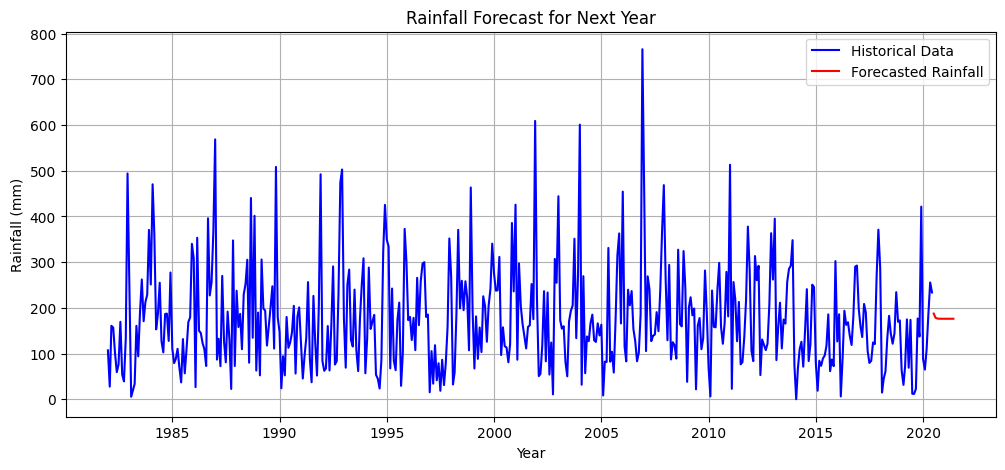

In [24]:
# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Total_Rainfall"], label="Historical Data", color="blue")
plt.plot(forecast_dates, forecast, label="Forecasted Rainfall", color="red")
plt.xlabel("Year")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Forecast for Next Year")
plt.legend()
plt.grid(True)
plt.show()

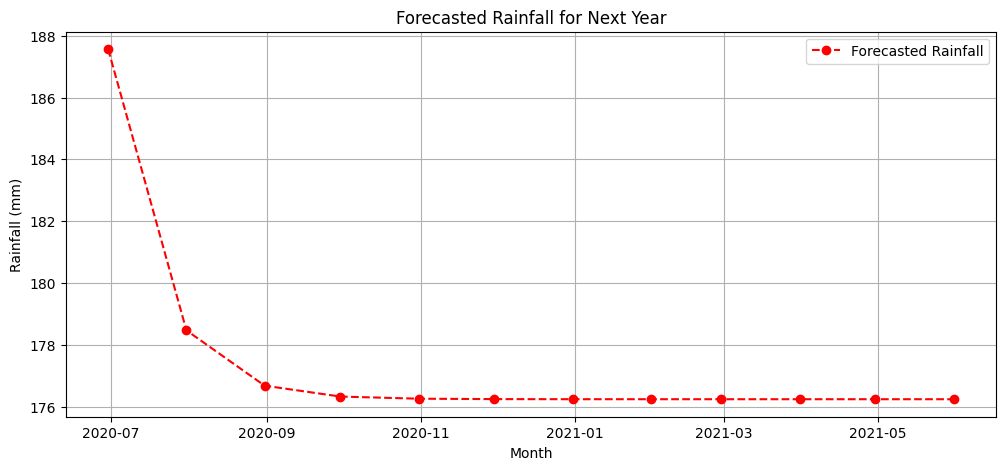

In [25]:
# Plot Future Forecast Separately
plt.figure(figsize=(12, 5))
plt.plot(forecast_dates, forecast, marker='o', linestyle='dashed', color='red', label='Forecasted Rainfall')
plt.xlabel("Month")
plt.ylabel("Rainfall (mm)")
plt.title("Forecasted Rainfall for Next Year")
plt.legend()
plt.grid(True)
plt.show()

In [28]:
# Predict Maximum Daily Rainfall in a Month
max_rainfall_model = ARIMA(df["Max_Rainfall_in_a_Day"], order=model.order)
max_rainfall_result = max_rainfall_model.fit()
max_forecast = max_rainfall_result.forecast(steps=12)
print("Predicted Max Daily Rainfall in a Month:")
print(max_forecast)

Predicted Max Daily Rainfall in a Month:
2020-07-01    50.812263
2020-08-01    52.147796
2020-09-01    52.329573
2020-10-01    52.354315
2020-11-01    52.357682
2020-12-01    52.358141
2021-01-01    52.358203
2021-02-01    52.358212
2021-03-01    52.358213
2021-04-01    52.358213
2021-05-01    52.358213
2021-06-01    52.358213
Freq: MS, Name: predicted_mean, dtype: float64


c:\Python3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Python3.12.4\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
# Convert the forecast series into a DataFrame with proper column names
forecast_df = pd.DataFrame({
    'Month': max_forecast.index.strftime('%b %Y'),  # Convert datetime index to readable format
    'Predicted Max Daily Rainfall in a Month': max_forecast.values
})

# Display the DataFrame
print(forecast_df)


       Month  Predicted Max Daily Rainfall in a Month
0   Jul 2020                                50.812263
1   Aug 2020                                52.147796
2   Sep 2020                                52.329573
3   Oct 2020                                52.354315
4   Nov 2020                                52.357682
5   Dec 2020                                52.358141
6   Jan 2021                                52.358203
7   Feb 2021                                52.358212
8   Mar 2021                                52.358213
9   Apr 2021                                52.358213
10  May 2021                                52.358213
11  Jun 2021                                52.358213
